In [9]:
import os
os.chdir("/gpfs/milgram/pi/turk-browne/projects/rtSynth_rt/")
!pwd
import matplotlib.pyplot as plt

/gpfs/milgram/pi/turk-browne/projects/rtSynth_rt


In [3]:

import os
import sys
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/')
import argparse
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import scipy.io as sio
import subprocess
from scipy.stats import zscore
from nibabel.nicom import dicomreaders
import pydicom as dicom  # type: ignore
import time
from glob import glob
import shutil
from nilearn.image import new_img_like
import joblib
import rtCommon.utils as utils
from rtCommon.utils import loadConfigFile
import pickle5 as pickle
# import and set up environment
import sys
from subprocess import call
import nibabel as nib
import pydicom as dicom
import numpy as np
import time
import os
from glob import glob
import shutil
import pandas as pd
# from import convertDicomFileToNifti
from rtCommon.imageHandling import convertDicomImgToNifti, readDicomFromFile
from rtCommon.cfg_loading import mkdir,cfg_loading

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
# from rtCommon.fileClient import FileInterface
# import rtCommon.projectUtils as projUtils
# from rtCommon.imageHandling import readRetryDicomFromFileInterface, getDicomFileName, convertDicomImgToNifti


argParser = argparse.ArgumentParser()
argParser.add_argument('--config', '-c', default='sub001.ses5.toml', type=str, help='experiment file (.json or .toml)')
argParser.add_argument('--skipPre', '-s', default=0, type=int, help='skip preprocess or not')
argParser.add_argument('--skipGreedy', '-g', default=0, type=int, help='skip greedy or not')
args = argParser.parse_args("")
from rtCommon.cfg_loading import mkdir,cfg_loading
# config="sub001.ses2.toml"
cfg = cfg_loading(args.config)



/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: The DICOM readers are highly experimental, unstable, and only work for Siemens time-series at the moment
Please use with caution.  We would be grateful for your help in improving them
  # Remove the CWD from sys.path while we load stuff.


conda env=/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud
toml filename=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/projects/rtSynth_rt/conf/sub001.ses5.toml


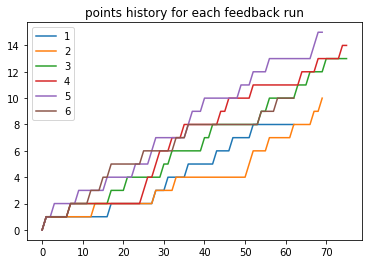

In [19]:
# load points history
for feedbackRun in range(1,7):
    history = pd.read_csv(f"{cfg.feedback_dir}{cfg.subjectName}_{feedbackRun}_history.csv")
    # _=plt.figure()
    _=plt.plot(history['points'],label=str(feedbackRun))
    _=plt.legend()
_=plt.title("points history for each feedback run")

In [26]:
runRecording = pd.read_csv(f"{cfg.feedback_dir}../runRecording.csv")
actualScans = list(runRecording['run'].iloc[list(np.where(1==1*(runRecording['type']=='feedback'))[0])]) # can be [1,2,3,4,5,6,7,8] or [1,2,4,5]
actualScans

[3, 4, 5, 6, 7, 8]

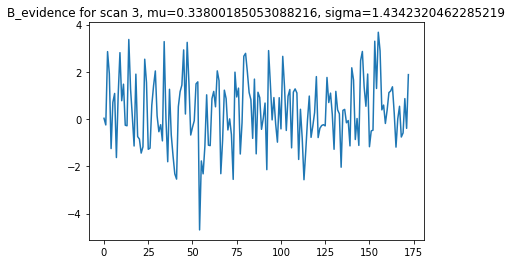

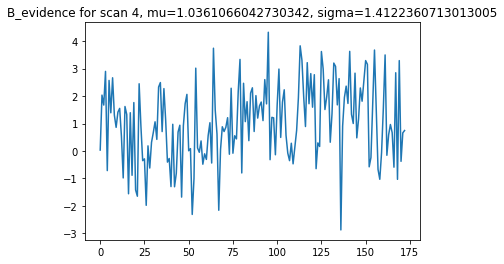

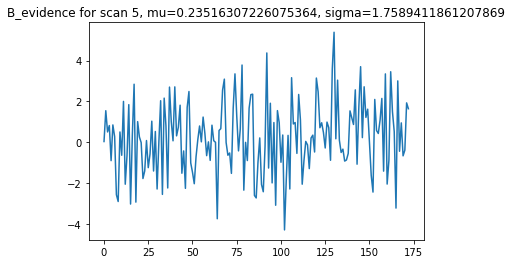

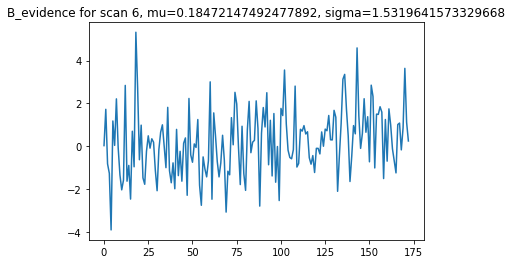

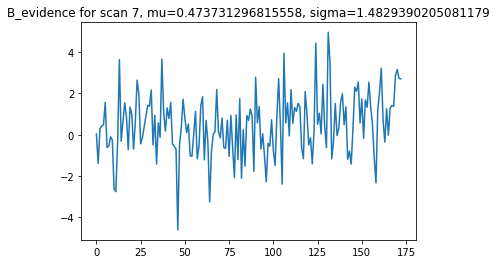

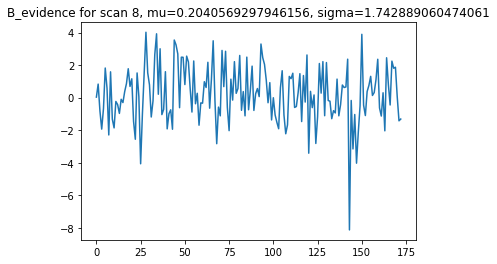

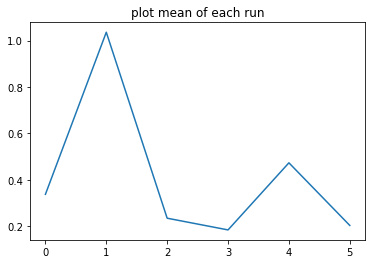

In [44]:
means=[]
for actualScan in actualScans:
    _=plt.figure()
    t=np.load(f"{cfg.feedback_dir}B_evidences_{actualScan}.npy")
    _=plt.plot(t)
    _=plt.title(f"B_evidence for scan {actualScan}, mu={np.mean(t)}, sigma={np.std(t)}")
    means.append(np.mean(t))

_=plt.figure()
_=plt.plot(means)
_=plt.title("plot mean of each run")


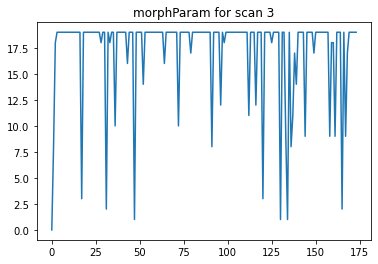

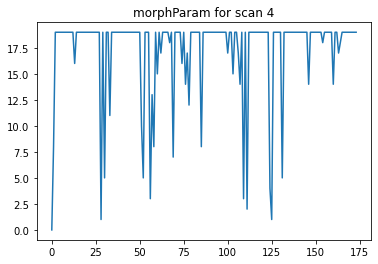

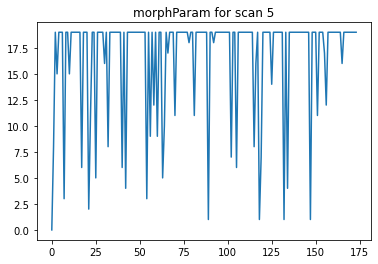

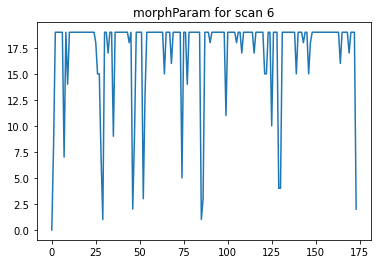

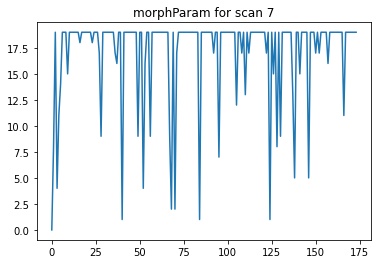

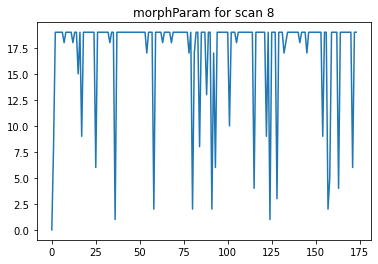

In [36]:
import scipy.io

for actualScan in actualScans:
    _=plt.figure()
    t=scipy.io.loadmat(f"{cfg.feedback_dir}morphParam_{actualScan}.mat")['value']
    _=plt.plot(t)
    _=plt.title(f"morphParam for scan {actualScan}")

In [38]:
a=np.zeros((3,4))
a[-1].shape

(4,)

In [40]:
X = np.expand_dims(a[-1], axis=0)
X.shape

(1, 4)